In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/Parasgr7/Google-Stock-Price-Prediction/master/Google_Stock_Price_Train.csv"
df = pd.read_csv(url)

In [25]:
# Preprocessing: Remove double quotes from "Close" column
df['Close'] = df['Close'].str.replace('"', '')

# Convert "Close" column to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)


In [26]:
# Preprocessing
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [27]:
# Splitting data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [28]:
# Function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [29]:
# Define sequence length
seq_length = 10

# Creating sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [30]:
# Building the RNN model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
29/29 [==============================] - 2s 7ms/step - loss: 0.0558
Epoch 2/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 3/10
29/29 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 4/10
29/29 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 5/10
29/29 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 6/10
29/29 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 7/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 8/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 9/10
29/29 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 10/10
29/29 [==============================] - 0s 6ms/step - loss: 0.0038


In [32]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

7/7 [==============================] - 1s 3ms/step - loss: 0.0012
Test Loss: 0.0011807202827185392


7/7 [==============================] - 1s 9ms/step


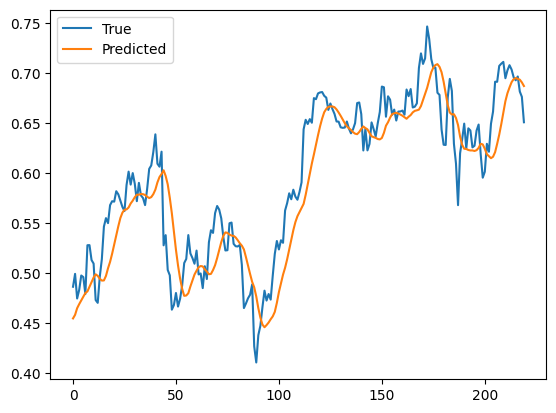

In [33]:
# Making predictions
predictions = model.predict(X_test)

# Plotting the results
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()